In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/yujing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_path = "./RNA_DE"
cell_type1 = "Granule"
cell_type2 = "Purkinje"

In [3]:
df = pd.read_csv(os.path.join(data_path, 
                              "deg_deseq2_ensemble_{}_{}.txt".format(cell_type1, cell_type2)), 
                 sep = "\t").reset_index().rename(columns = {"index" : "gene"})
df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Cntn6,8.908129,4.126793,0.108970,37.870922,0.000000e+00,0.000000e+00
1,Itpr1,16.483647,-6.290720,0.122108,-51.517559,0.000000e+00,0.000000e+00
2,Nell1,1.953287,-5.634185,0.143917,-39.148839,0.000000e+00,0.000000e+00
3,Cntnap5b,3.618299,-7.030953,0.197405,-35.616926,7.663994e-278,2.730106e-274
4,Cadps2,4.863439,6.774800,0.191527,35.372633,4.500514e-274,1.282556e-270
...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,NaN,NaN,NaN,NaN,NaN
24405,Calml3,0.000000,NaN,NaN,NaN,NaN,NaN
24406,Gm2399,0.000000,NaN,NaN,NaN,NaN,NaN
24407,Gm29501,0.000000,NaN,NaN,NaN,NaN,NaN


/Users/yujing/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


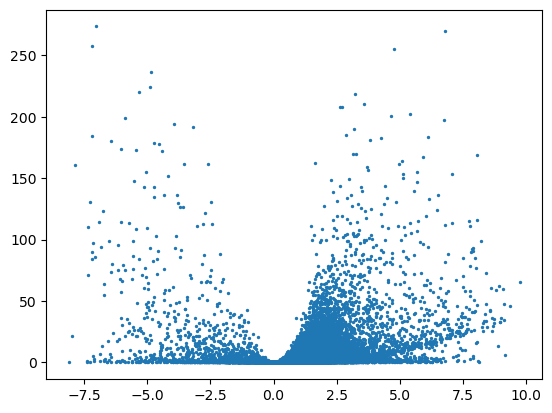

In [4]:
plt.scatter(df["log2FoldChange"], -np.log10(df["padj"]) , s = 2)

# use log fold change 2 / -2 as cuttoff

In [5]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] > 2)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Cntn6,8.908129,4.126793,0.108970,37.870922,0.000000e+00,0.000000e+00
4,Cadps2,4.863439,6.774800,0.191527,35.372633,4.500514e-274,1.282556e-270
6,Scn2a1,4.248591,4.759786,0.138491,34.368929,7.345748e-259,1.495280e-255
10,Syne1,9.975983,3.209684,0.100858,31.823883,3.025710e-222,3.919395e-219
11,Pclo,9.479797,3.600796,0.115252,31.242916,2.786230e-214,3.308416e-211
...,...,...,...,...,...,...,...
7426,Chadl,0.333349,3.131537,1.111368,2.817732,4.836413e-03,9.278854e-03
7430,Gm16054,0.337315,2.920752,1.038761,2.811766,4.927033e-03,9.447625e-03
7434,Tead4,0.349532,5.433518,1.935519,2.807267,4.996385e-03,9.575453e-03
7451,Tha1,0.301161,2.467915,0.881631,2.799261,5.121965e-03,9.793731e-03


In [6]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] < -2)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1,Itpr1,16.483647,-6.290720,0.122108,-51.517559,0.000000e+00,0.000000e+00
2,Nell1,1.953287,-5.634185,0.143917,-39.148839,0.000000e+00,0.000000e+00
3,Cntnap5b,3.618299,-7.030953,0.197405,-35.616926,7.663994e-278,2.730106e-274
5,Shisa6,6.284817,-7.196547,0.208070,-34.587075,3.952408e-262,9.386310e-259
7,Frmpd4,19.894972,-4.865881,0.146933,-33.116246,1.734657e-240,3.089641e-237
...,...,...,...,...,...,...,...
7342,Gm15856,0.163573,-6.733588,2.345732,-2.870570,4.097322e-03,7.950802e-03
7371,X2310022B05Rik,0.405603,-2.263836,0.793178,-2.854134,4.315431e-03,8.341097e-03
7387,Gm10851,0.568367,-4.337639,1.523498,-2.847158,4.411139e-03,8.507624e-03
7394,Fam69c,0.151353,-4.448443,1.565509,-2.841531,4.489746e-03,8.651033e-03


# use log fold change 3 / -3 as cuttoff

In [7]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] > 3)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Cntn6,8.908129,4.126793,0.108970,37.870922,0.000000e+00,0.000000e+00
4,Cadps2,4.863439,6.774800,0.191527,35.372633,4.500514e-274,1.282556e-270
6,Scn2a1,4.248591,4.759786,0.138491,34.368929,7.345748e-259,1.495280e-255
10,Syne1,9.975983,3.209684,0.100858,31.823883,3.025710e-222,3.919395e-219
11,Pclo,9.479797,3.600796,0.115252,31.242916,2.786230e-214,3.308416e-211
...,...,...,...,...,...,...,...
7417,Gm26952,0.174621,3.979780,1.407252,2.828050,4.683253e-03,8.995911e-03
7424,Fxyd6,0.261696,5.192598,1.838944,2.823685,4.747507e-03,9.110737e-03
7426,Chadl,0.333349,3.131537,1.111368,2.817732,4.836413e-03,9.278854e-03
7434,Tead4,0.349532,5.433518,1.935519,2.807267,4.996385e-03,9.575453e-03


In [8]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] < -3)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1,Itpr1,16.483647,-6.290720,0.122108,-51.517559,0.000000e+00,0.000000e+00
2,Nell1,1.953287,-5.634185,0.143917,-39.148839,0.000000e+00,0.000000e+00
3,Cntnap5b,3.618299,-7.030953,0.197405,-35.616926,7.663994e-278,2.730106e-274
5,Shisa6,6.284817,-7.196547,0.208070,-34.587075,3.952408e-262,9.386310e-259
7,Frmpd4,19.894972,-4.865881,0.146933,-33.116246,1.734657e-240,3.089641e-237
...,...,...,...,...,...,...,...
7340,Gm15261,1.171850,-3.586741,1.248632,-2.872537,4.071898e-03,7.903620e-03
7342,Gm15856,0.163573,-6.733588,2.345732,-2.870570,4.097322e-03,7.950802e-03
7387,Gm10851,0.568367,-4.337639,1.523498,-2.847158,4.411139e-03,8.507624e-03
7394,Fam69c,0.151353,-4.448443,1.565509,-2.841531,4.489746e-03,8.651033e-03


# proceed with threshold 2 first

In [9]:
# check foldchange Granule cell marker gene
df[df["gene"].isin(["Gabra6", "Ppp1r17"])]
# fold change is calculated by granule / purkinje

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
497,Ppp1r17,0.801908,-3.755936,0.249181,-15.073128,2.433148e-51,6.961832e-50
2677,Gabra6,1.995268,8.885507,1.158021,7.673011,1.680056e-14,8.939175e-14


In [10]:
category = np.zeros(df.shape[0]).astype(object)
category[(df["padj"] < 0.01) & (df["log2FoldChange"] > 2)] = cell_type1
category[(df["padj"] < 0.01) & (df["log2FoldChange"] < -2)] = cell_type2

In [11]:
df["category"] = category
df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Cntn6,8.908129,4.126793,0.108970,37.870922,0.000000e+00,0.000000e+00,Granule
1,Itpr1,16.483647,-6.290720,0.122108,-51.517559,0.000000e+00,0.000000e+00,Purkinje
2,Nell1,1.953287,-5.634185,0.143917,-39.148839,0.000000e+00,0.000000e+00,Purkinje
3,Cntnap5b,3.618299,-7.030953,0.197405,-35.616926,7.663994e-278,2.730106e-274,Purkinje
4,Cadps2,4.863439,6.774800,0.191527,35.372633,4.500514e-274,1.282556e-270,Granule
...,...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
24405,Calml3,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
24406,Gm2399,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
24407,Gm29501,0.000000,NaN,NaN,NaN,NaN,NaN,0.0


/Users/yujing/miniconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


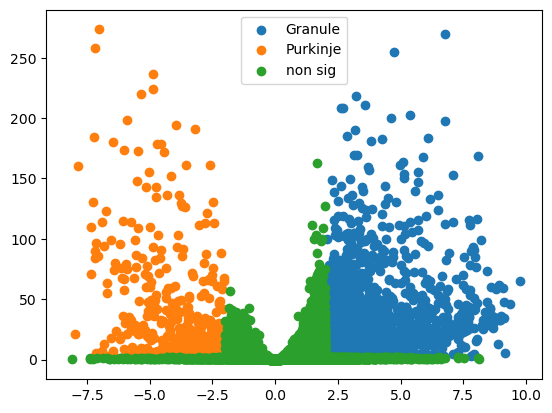

In [12]:
plt.scatter(df[df["category"] == cell_type1]["log2FoldChange"], -np.log10(df[df["category"] == cell_type1]["padj"]), label = cell_type1)
plt.scatter(df[df["category"] == cell_type2]["log2FoldChange"], -np.log10(df[df["category"] == cell_type2]["padj"]), label = cell_type2 )
plt.scatter(df[df["category"] == 0]["log2FoldChange"], -np.log10(df[df["category"] == 0]["padj"]), label = "non sig" )
plt.legend()

In [13]:
DE_genes = df[df["category"] != 0]
DE_genes

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Cntn6,8.908129,4.126793,0.108970,37.870922,0.000000e+00,0.000000e+00,Granule
1,Itpr1,16.483647,-6.290720,0.122108,-51.517559,0.000000e+00,0.000000e+00,Purkinje
2,Nell1,1.953287,-5.634185,0.143917,-39.148839,0.000000e+00,0.000000e+00,Purkinje
3,Cntnap5b,3.618299,-7.030953,0.197405,-35.616926,7.663994e-278,2.730106e-274,Purkinje
4,Cadps2,4.863439,6.774800,0.191527,35.372633,4.500514e-274,1.282556e-270,Granule
...,...,...,...,...,...,...,...,...
7426,Chadl,0.333349,3.131537,1.111368,2.817732,4.836413e-03,9.278854e-03,Granule
7430,Gm16054,0.337315,2.920752,1.038761,2.811766,4.927033e-03,9.447625e-03,Granule
7434,Tead4,0.349532,5.433518,1.935519,2.807267,4.996385e-03,9.575453e-03,Granule
7451,Tha1,0.301161,2.467915,0.881631,2.799261,5.121965e-03,9.793731e-03,Granule


In [14]:
DE_genes[DE_genes["category"] == "Purkinje"].to_csv("MLI1_Purk_Purk_upregulated_DE_genes.csv")

# Map back to genome

In [15]:
meta = pd.read_csv(os.path.join("../annot", "Final", "mm10_25kb_bins_genes_09022022.csv"))
meta = meta[["name", "chrom", "start", "end", "gene", "100kb name", "100kb bin", "200kb name", "200kb bin"]]
meta["gene"] = meta["gene"].str.replace("-", ".")

# Mismatch between DE gene naming and annotated namming

In [16]:
DE_sig_25kb = meta.merge(DE_genes)

In [17]:
# missing genes
miss_genes = [x for x in DE_genes["gene"]  if x not in DE_sig_25kb["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes), len(miss_genes) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df = df[df["gene"].isin(miss_genes)]
miss_df

missing 281 gene, 0.09073296738779464 of detected DE genes


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
6,Scn2a1,4.248591,4.759786,0.138491,34.368929,7.345748e-259,1.495280e-255,Granule
15,Inadl,4.941397,4.633695,0.152046,30.475560,5.494135e-204,4.892870e-201,Granule
38,Fam21,2.141356,-3.550893,0.129808,-27.355000,9.416983e-165,3.440579e-162,Purkinje
83,Gm38112,2.035122,6.480250,0.270380,23.967168,6.119781e-127,1.038104e-124,Granule
152,Gm15800,4.105419,2.914262,0.136356,21.372485,2.409590e-101,2.244068e-99,Granule
...,...,...,...,...,...,...,...,...
7387,Gm10851,0.568367,-4.337639,1.523498,-2.847158,4.411139e-03,8.507624e-03,Purkinje
7394,Fam69c,0.151353,-4.448443,1.565509,-2.841531,4.489746e-03,8.651033e-03,Purkinje
7416,Gm8186,0.425671,2.665984,0.942648,2.828186,4.681263e-03,8.993302e-03,Granule
7417,Gm26952,0.174621,3.979780,1.407252,2.828050,4.683253e-03,8.995911e-03,Granule


# OK! tried our best to get all genes

In [18]:
DE_sig_25kb["200kb bin"] = DE_sig_25kb["start"] // 200000
DE_sig_25kb["200kb name"] = DE_sig_25kb["chrom"] + "-g" + DE_sig_25kb["200kb bin"].astype(str)

In [19]:
cols = ["200kb name","chrom", "200kb bin", "gene", "baseMean", "log2FoldChange", "pvalue", "padj", "category"]

In [20]:
DE_sig_200kb = DE_sig_25kb.copy()

In [21]:
# Get DE norm counts
# Do not repeat count version
DE_sig_200kb_no_dup = DE_sig_200kb.drop_duplicates(subset=["gene", "200kb name"], keep='first')

In [22]:
# get norm counts
norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")

idx = (norm_counts.iloc[0].isin([cell_type1 ,cell_type2, "CLUSTER"])).values

norm_counts = norm_counts.iloc[:, idx]

# take a look
norm_counts.head()

/var/folders/j4/wgbmg2rn5q768jr012zxqngh0000gn/T/ipykernel_54756/3433087015.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")


,ID,VIIa_F002.6,VIIa_M002.6,VIIa_M006.6,VIIb_F002.6,VIIb_M002.5,VIIb_M006.6,VIIc_M002.6,VIId_M002.6,VIIa_F002.13,VIIa_M002.14,VIIa_M006.14,VIIb_F002.13,VIIb_M002.12,VIIb_M006.13,VIIc_M002.13,VIId_M002.14
0,CLUSTER,Granule,Granule,Granule,Granule,Granule,Granule,Granule,Granule,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje,Purkinje
1,Xkr4,7.55574393741819,15.6081641844892,17.7838761252477,12.9276361921097,12.8406454612401,15.8110321946947,14.0728376325053,12.9517072272098,4.24757424683673,7.32575539639509,6.77040272954583,4.88759111929643,5.98418574980771,6.4782076952491,7.64406096738078,5.28790896346163
2,Gm1992,0.930780050261661,1.75309090477958,1.64065371998299,1.41672725392983,1.59244225208293,1.41543319749047,1.90818137389903,2.25247082212345,1.21359264195335,0.754121879040671,1.1284004549243,0.610948889912054,1.07715343496539,1.06358633802597,1.31382297876857,1.61574996105772
3,Gm37381,0,0.0848269792635282,0,0.0590303022470762,0,0.0482534044599025,0.0265025190819309,0.0244833785013418,0.0606796320976676,0,0,0,0,0,0,0
4,Rp1,0.109503535324901,0.0565513195090188,0.0607649525919625,0,0.151661166865041,0.0482534044599025,0.132512595409655,0.0979335140053673,0.121359264195335,0.10773169700581,0.14560005869991,0.0678832099902282,0,0.0966896670932702,0.119438452615325,0


In [23]:
n1 = ["{}_{}".format(cell_type1, i) for i in range(1, 9)]
n2 = ["{}_{}".format(cell_type2, i) for i in range(1, 9)]

norm_counts.columns = ['gene'] + n1 + n2
norm_counts = norm_counts.iloc[1:].reset_index(drop = True)
norm_counts.head()
# turn dataframes to numeric
norm_counts[n1 + n2] = norm_counts[n1 + n2].apply(pd.to_numeric, errors='coerce')

In [24]:
norm_counts["{}_mean".format(cell_type1)] = norm_counts[n1].mean(axis=1)
norm_counts["{}_mean".format(cell_type2)] = norm_counts[n2].mean(axis=1)
norm_counts

,gene,Granule_1,Granule_2,Granule_3,Granule_4,Granule_5,Granule_6,Granule_7,Granule_8,Purkinje_1,Purkinje_2,Purkinje_3,Purkinje_4,Purkinje_5,Purkinje_6,Purkinje_7,Purkinje_8,Granule_mean,Purkinje_mean
0,Xkr4,7.555744,15.608164,17.783876,12.927636,12.840645,15.811032,14.072838,12.951707,4.247574,7.325755,6.770403,4.887591,5.984186,6.478208,7.644061,5.287909,13.693955,6.078211
1,Gm1992,0.930780,1.753091,1.640654,1.416727,1.592442,1.415433,1.908181,2.252471,1.213593,0.754122,1.128400,0.610949,1.077153,1.063586,1.313823,1.615750,1.613722,1.097172
2,Gm37381,0.000000,0.084827,0.000000,0.059030,0.000000,0.048253,0.026503,0.024483,0.060680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030387,0.007585
3,Rp1,0.109504,0.056551,0.060765,0.000000,0.151661,0.048253,0.132513,0.097934,0.121359,0.107732,0.145600,0.067883,0.000000,0.096690,0.119438,0.000000,0.082148,0.082338
4,Sox17,0.000000,0.000000,0.020255,0.000000,0.000000,0.016084,0.026503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007855,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24405,Calml3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24406,Gm2399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24407,Gm29501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
# filter out DE genes get norm counts
DE_sig_200kb_no_dup = DE_sig_200kb_no_dup.merge(norm_counts[["gene","{}_mean".format(cell_type1), "{}_mean".format(cell_type2)]])
DE_sig_200kb_no_dup.to_csv(os.path.join(data_path, "{}_{}_DE_sig_sum_200kb_no_dup.csv".format(cell_type1, cell_type2)), index = None)

In [26]:
DE_sig_200kb_no_dup

,name,chrom,start,end,gene,100kb name,100kb bin,200kb name,200kb bin,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category,Granule_mean,Purkinje_mean
0,chr1-77,chr1,4900000,4925000,Rgs20,chr1-g49,49.0,chr1-g24,24,3.414300,3.820095,0.381453,10.014585,1.315133e-23,1.167559e-22,Granule,1.789808,0.108034
1,chr1-81,chr1,5000000,5025000,Rgs20,chr1-g50,50.0,chr1-g25,25,3.414300,3.820095,0.381453,10.014585,1.315133e-23,1.167559e-22,Granule,1.789808,0.108034
2,chr1-129,chr1,6200000,6225000,Rb1cc1,chr1-g62,62.0,chr1-g31,31,4.202946,2.308001,0.126333,18.269233,1.454814e-74,7.734940e-73,Granule,6.656880,1.271722
3,chr1-140,chr1,6475000,6500000,St18,chr1-g64,64.0,chr1-g32,32,6.810724,6.444024,0.632633,10.186046,2.288854e-24,2.112298e-23,Granule,10.961785,0.126635
4,chr1-145,chr1,6600000,6625000,St18,chr1-g66,66.0,chr1-g33,33,6.810724,6.444024,0.632633,10.186046,2.288854e-24,2.112298e-23,Granule,10.961785,0.126635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,chrX-6475,chrX,167600000,167625000,Frmpd4,chrX-g1676,1676.0,chrX-g838,838,19.894972,-4.865881,0.146933,-33.116246,1.734657e-240,3.089641e-237,Purkinje,2.665409,79.136175
4242,chrX-6483,chrX,167800000,167825000,Frmpd4,chrX-g1678,1678.0,chrX-g839,839,19.894972,-4.865881,0.146933,-33.116246,1.734657e-240,3.089641e-237,Purkinje,2.665409,79.136175
4243,chrX-6491,chrX,168000000,168025000,Frmpd4,chrX-g1680,1680.0,chrX-g840,840,19.894972,-4.865881,0.146933,-33.116246,1.734657e-240,3.089641e-237,Purkinje,2.665409,79.136175
4244,chrX-6499,chrX,168200000,168225000,Frmpd4,chrX-g1682,1682.0,chrX-g841,841,19.894972,-4.865881,0.146933,-33.116246,1.734657e-240,3.089641e-237,Purkinje,2.665409,79.136175


In [27]:
temp = {"category" : ",".join, 
        "{}_mean".format(cell_type1) : sum,
        "{}_mean".format(cell_type2) : sum,
        "gene": ",".join}
final_200kb = DE_sig_200kb_no_dup.groupby("200kb name").agg(temp).reset_index()

In [28]:
final_200kb

,200kb name,category,Granule_mean,Purkinje_mean,gene
0,chr1-g104,Granule,3.342018,0.229585,Paqr8
1,chr1-g111,Granule,107.981704,0.841670,Rims1
2,chr1-g112,Granule,107.981704,0.841670,Rims1
3,chr1-g113,Granule,107.981704,0.841670,Rims1
4,chr1-g114,Granule,107.981704,0.841670,Rims1
...,...,...,...,...,...
3458,chrX-g840,Purkinje,2.665409,79.136175,Frmpd4
3459,chrX-g841,Purkinje,2.665409,79.136175,Frmpd4
3460,chrX-g842,Purkinje,2.665409,79.136175,Frmpd4
3461,chrX-g90,Granule,4.550336,0.675905,Kdm6a


In [29]:
# further format
final_200kb["chrom"]  = final_200kb["200kb name"].str.split("-").str[0]
# add small number to 0
final_200kb = final_200kb.replace(0, 0.05)
final_200kb 

,200kb name,category,Granule_mean,Purkinje_mean,gene,chrom
0,chr1-g104,Granule,3.342018,0.229585,Paqr8,chr1
1,chr1-g111,Granule,107.981704,0.841670,Rims1,chr1
2,chr1-g112,Granule,107.981704,0.841670,Rims1,chr1
3,chr1-g113,Granule,107.981704,0.841670,Rims1,chr1
4,chr1-g114,Granule,107.981704,0.841670,Rims1,chr1
...,...,...,...,...,...,...
3458,chrX-g840,Purkinje,2.665409,79.136175,Frmpd4,chrX
3459,chrX-g841,Purkinje,2.665409,79.136175,Frmpd4,chrX
3460,chrX-g842,Purkinje,2.665409,79.136175,Frmpd4,chrX
3461,chrX-g90,Granule,4.550336,0.675905,Kdm6a,chrX


In [30]:
# rank final output
final_200kb["chrom_id"] = final_200kb["chrom"].str[3:].replace("X", 20).astype(int)
final_200kb["group"] = final_200kb["200kb name"].str.split("-").str[1].str[1:].astype(int)
final_200kb = final_200kb.sort_values(by = ["chrom_id", "group"])
final_200kb["log2FC_{}2{}".format(cell_type1[:1], cell_type2[:1])] =  np.log2(final_200kb["{}_mean".format(cell_type1)].values / final_200kb["{}_mean".format(cell_type2)].values)
final_200kb

,200kb name,category,Granule_mean,Purkinje_mean,gene,chrom,chrom_id,group,log2FC_G2P
37,chr1-g24,Granule,1.789808,0.108034,Rgs20,chr1,1,24,4.050246
38,chr1-g25,Granule,1.789808,0.108034,Rgs20,chr1,1,25,4.050246
59,chr1-g31,Granule,6.656880,1.271722,Rb1cc1,chr1,1,31,2.388063
61,chr1-g32,Granule,10.961785,0.126635,St18,chr1,1,32,6.435659
63,chr1-g33,Granule,10.961785,0.126635,St18,chr1,1,33,6.435659
...,...,...,...,...,...,...,...,...,...
3456,chrX-g838,Purkinje,2.665409,79.136175,Frmpd4,chrX,20,838,-4.891908
3457,chrX-g839,Purkinje,2.665409,79.136175,Frmpd4,chrX,20,839,-4.891908
3458,chrX-g840,Purkinje,2.665409,79.136175,Frmpd4,chrX,20,840,-4.891908
3459,chrX-g841,Purkinje,2.665409,79.136175,Frmpd4,chrX,20,841,-4.891908


In [31]:
final_200kb.to_csv(os.path.join(data_path, "{}_{}_DE_200kb_FoldChange.csv".format(cell_type1, cell_type2)), index = False)